### Exercice 1
Montrer que:
$$
\begin{align}
\hat{\beta}_2 = \frac{∑_{i=1}^{n}(t_i - \bar{t})X_i}{\sum_{i=1}^{n}(t_i-\bar{t})^2} && \text{(I)}\\
\hat{\beta}_1 = \bar{X} - \hat{\beta}{_2}\bar{t} && \text{(II)}
\end{align}
$$

On cherche à minimiser $S(\beta_1,\beta_2) = \sum_{i=1}^{n}(X_i - \beta_1 - \beta_2t_i)^2$. On note les matrices $\underline{T} = [ \mathbf{1} \quad \mathbf{t} ]$ et $\boldsymbol{\beta} = [\beta_1 \quad \beta_2]^T$. On a que $\sum_{i=1}^{n}(X_i - \beta_1 - \beta_2t_i)^2 = || X - \underline{T}\boldsymbol{\beta}||^2 $.

Soit $f$ la fonction $f : \beta \mapsto  ||X - \underline{T}\boldsymbol{\beta}||^2$. Pour calculer sa derivée, on veut obtenir une expression de la forme:


$$
f(\boldsymbol{\beta} + \mathbf{h}) - f(\mathbf{\beta}) = <\nabla f(\boldsymbol{\beta}),\mathbf{h}> + o(||\mathbf{h}||)
$$

$f(\boldsymbol{\beta} + \mathbf{h})= || X - \underline{T}\boldsymbol{\beta} - \underline{T}\mathbf{h}||^2 = || X - \underline{T}\boldsymbol{\beta} ||^2 + ||\underline{T}\mathbf{h}||^2 - 2<X - \underline{T}\boldsymbol{\beta},\underline{T}\mathbf{h}>$. En outre, on sait que $<X - \underline{T}\boldsymbol{\beta},\underline{T}\mathbf{h}> = <\underline{T}^T(X - \underline{T}\boldsymbol{\beta}),\mathbf{h}> $. Nous avons donc:

$$
\nabla f(\boldsymbol{\beta}) = -2\underline{T}^T(X - \underline{T}\boldsymbol{\beta})
$$

Pour minimiser $S(\beta_1,\beta_2)$, on cherche les points critiques dont le gradient vaut 0.

$$
\underline{T}^TX - \underline{T}^T\underline{T}\hat{\boldsymbol{\beta}} = 0 ⇒ \underline{T}^TX = \underline{T}^T\underline{T}\hat{\boldsymbol{\beta}}
$$

D'après la lettre $\boldsymbol{a)}$ de l'exercice 1 traité pendant la PC2, on sait que $\underline{T}^T\underline{T}$ est inversible. Donc, la solution est $\hat{\boldsymbol{\beta}} = (\underline{T}^T\underline{T})^{-1}\underline{T}^TX $

En calculand $\underline{T}^T\underline{T}$ et son inverse, on obtient:

$$
\underline{T}^T\underline{T} = n\begin{bmatrix}1 & \bar{t} \\
 \bar{t} & \overline{t^2}
 \end{bmatrix}
$$

$$
 (\underline{T}^T\underline{T})^{-1} = \frac{1}{ns}\begin{bmatrix}\overline{t^2} & -\bar{t} \\
 -\bar{t} & 1
 \end{bmatrix}
$$
tel que $\overline{t^2} = \frac{1}{n}\sum_{i=1}^{n}t_i^2$ et $ns = n(\frac{1}{n}\sum_{i=1}^{n}t_i^2 - \bar{t}^2) = \sum_{i=1}^{n}(t_i - \bar{t})^2$.



En utilisant la matrice inverse trouvé pour l'expression de $\hat{\boldsymbol{\beta}}$, on arrive à:

$$
\hat{\boldsymbol{\beta}} = \frac{1}{ns}\begin{bmatrix}\overline{t^2} & -\bar{t} \\
 -\bar{t} & 1
 \end{bmatrix}\begin{bmatrix}\sum_{i=1}^{n}X_i \\ \sum_{i=1}^{n}t_iX_i
  \end{bmatrix}
$$


Donc, $\hat{\beta_2} = \frac{1}{ns}(\sum_{i=1}^{n}t_iX_i - \bar{t}\sum_{i=1}^{n}X_i) = \frac{\sum_{i=1}^{n}(t_i - \bar{t})X_i}{\sum_{i=1}^{n}(t_i - \bar{t})^2}$

En outre, $\hat{\beta_1} = (\sum_{i=1}^{n}X_i\overline{t^2} - \bar{t}\sum_{i=1}^{n}X_it_i)\frac{1}{ns} = (\sum_{i=1}^{n}X_i\overline{t^2} -\sum_{i=1}^{n}X_i\bar{t}^2 + \sum_{i=1}^{n}X_i\bar{t}^2 -\bar{t}\sum_{i=1}^{n}X_it_i)\frac{1}{ns} $


$$
\hat{\beta_1} = \frac{1}{n}(\sum_{i=1}^{n}X_i)\frac{(\overline{t^2} -  \bar{t}^2)}{s} - \bar{t}\frac{\sum_{i=1}^{n}X_i(t_i - \bar{t})}{ns} = \bar{X} - \hat{\beta_2}\bar{t}
$$
$\mathbf{C.Q.D}$

### Exploration Numérique

## Exercice 2

Nous considérons les données des anomalies de températures annuelles à la surface du globe décrites sur [NASA GISTEMP](https://data.giss.nasa.gov/gistemp/).  
Nous utilisons ici le fichier .csv fournis par la NASA couvrant la période 1880–2020.

Afin d’analyser ces données, nous visualisons d’abord l’évolution temporelle des anomalies (moyenne annuelle, anomalies saisonnières et mensuelles), puis leur distribution statistique.  


In [72]:
#packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df = pd.read_csv("/content/GLB.Ts+dSST.csv", skiprows=1)
df = df[pd.to_numeric(df['Year'], errors='coerce').notnull()]
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-.10,-.14,-.23,-.22,-.17,-.17,***,***,-0.12,-.16,-.20
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-.03,-.15,-.22,-.18,-.07,-.09,-.09,-.17,0.05,-.07,-.18
2,1882,0.16,0.14,0.04,-0.17,-0.14,-0.23,-0.16,-.07,-.14,-.24,-.16,-.36,-.11,-.09,.08,-0.09,-.15,-.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.17,-0.07,-0.06,-.14,-.21,-.11,-.23,-.11,-.17,-.19,-.34,-0.15,-.09,-.18
4,1884,-0.13,-0.07,-0.35,-0.40,-0.33,-0.35,-0.30,-.27,-.27,-.25,-.33,-.31,-.28,-.26,-.10,-0.36,-.31,-.28


In [73]:
df.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
141,2021,0.81,0.64,0.89,0.76,0.79,0.85,0.92,.81,.92,.99,.92,.87,.85,.84,.75,0.81,.86,.94
142,2022,0.91,0.89,1.04,0.83,0.84,0.92,0.94,.95,.89,.97,.73,.80,.89,.90,.89,0.91,.94,.86
143,2023,0.88,0.97,1.23,0.99,0.94,1.08,1.19,1.19,1.48,1.34,1.41,1.37,1.17,1.12,.88,1.05,1.15,1.41
144,2024,1.25,1.44,1.39,1.31,1.14,1.20,1.19,1.30,1.23,1.33,1.29,1.27,1.28,1.29,1.35,1.28,1.23,1.28
145,2025,1.37,1.26,1.36,1.23,1.07,1.04,1.03,***,***,***,***,***,***,***,1.30,1.22,***,***


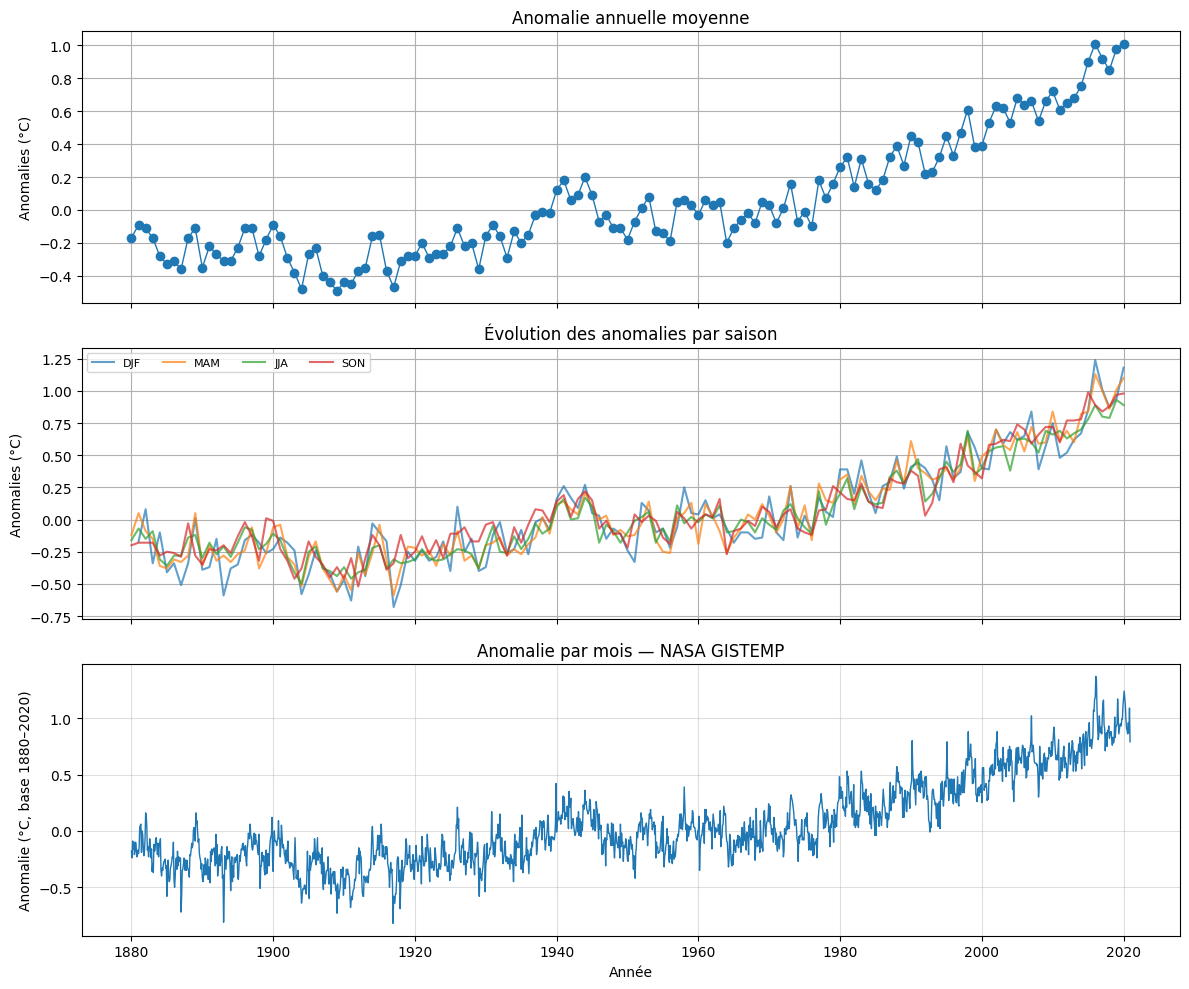

In [74]:
df = df[0:-5]  # On s'interesse à1880–2020
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df['YearDate'] = pd.to_datetime(df['Year'].astype(str) + '-01-01')


months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
long_df = df.melt(id_vars=['Year'], value_vars=months, var_name='Month', value_name='Anomaly')
month_map = {m:i+1 for i,m in enumerate(months)}
long_df['MonthNum'] = long_df['Month'].map(month_map)
long_df['Date'] = pd.to_datetime(dict(year=long_df['Year'], month=long_df['MonthNum'], day=1), errors='coerce')
mask = (long_df['Date'] >= "1880-01-01") & (long_df['Date'] <= "2020-12-31") #pour etre sur
plot_df = long_df.loc[mask].copy().sort_values('Date').dropna(subset=['Anomaly'])



fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

#Premier graphique avec analyse temporel des anomalies annuelles moyennes
axs[0].plot(df['YearDate'], df['J-D'], marker='o', linewidth=1)
axs[0].set_title("Anomalie annuelle moyenne")
axs[0].set_ylabel("Anomalies (°C)")
axs[0].grid(True)

#Analyse temporel des anomalies en chaque season
seasons = ["DJF","MAM","JJA","SON"]
for m in seasons:
    axs[1].plot(df['YearDate'], df[m], label=m, alpha=0.7)
axs[1].set_title("Évolution des anomalies par saison")
axs[1].set_ylabel("Anomalies (°C)")
axs[1].legend(ncol=4, fontsize=8)
axs[1].grid(True)

#Analyse temporel des anomalies par mois
axs[2].plot(plot_df['Date'], plot_df['Anomaly'], linewidth=1)
axs[2].set_title("Anomalie par mois — NASA GISTEMP")
axs[2].set_xlabel("Année")
axs[2].set_ylabel("Anomalie (°C, base 1880–2020)")
axs[2].grid(True, alpha=0.4)

axs[2].xaxis.set_major_locator(mdates.YearLocator(20))  # marca a cada 20 anos
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


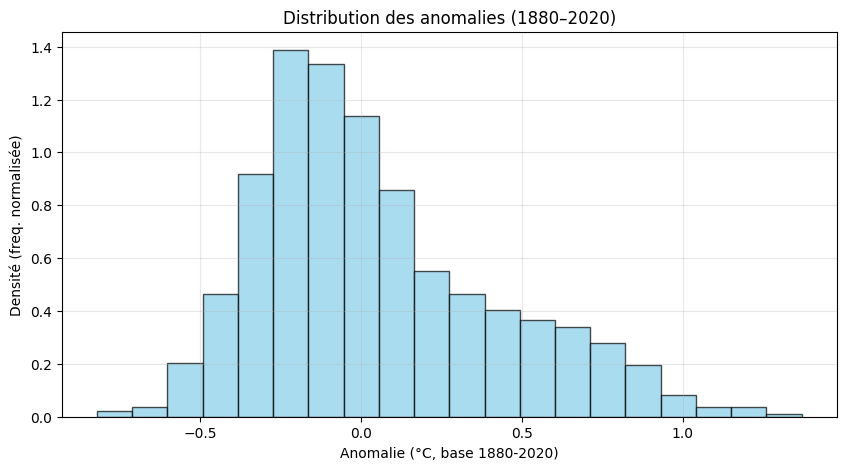

In [75]:
plt.figure(figsize=(10,5))
plt.hist(plot_df['Anomaly'], bins=20, color="skyblue", edgecolor="black", alpha=0.7, density=True)
plt.title("Distribution des anomalies (1880–2020)")
plt.xlabel("Anomalie (°C, base 1880-2020)")
plt.ylabel("Densité (freq. normalisée)")
plt.grid(True, alpha=0.3)

plt.show()

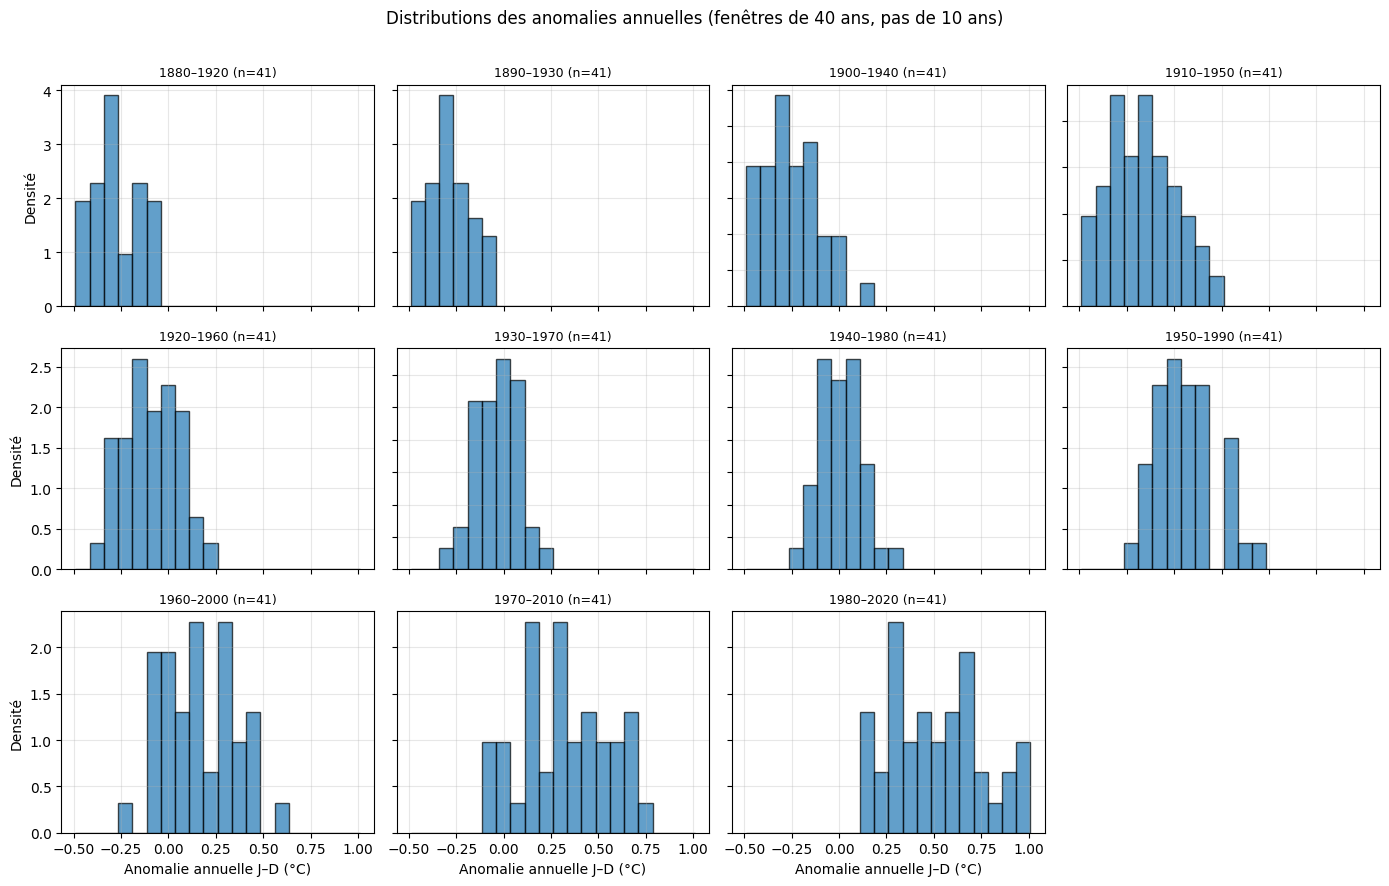

In [76]:
series = df[['Year', 'J-D']].dropna()
series = series[(series['Year'] >= 1880) & (series['Year'] <= 2020)]

windows = [(start, start + 40) for start in range(1880, 1981, 10)]  # 1880..1980

global_min = series['J-D'].min()
global_max = series['J-D'].max()
bins = np.linspace(global_min, global_max, 21)  # 20 bins

fig, axes = plt.subplots(3, 4, figsize=(14, 9))
axes = axes.flatten()

for k, (a, b) in enumerate(windows):
    ax = axes[k]
    w = series[(series['Year'] >= a) & (series['Year'] <= b)]['J-D'].dropna()
    ax.hist(w, bins=bins, density=True, edgecolor="black", alpha=0.7)
    ax.set_title(f"{a}–{b} (n={len(w)})", fontsize=9)
    if k % 4 == 0:
        ax.set_ylabel("Densité")
    else:
        ax.set_yticklabels([])
    if k >= 8:
        ax.set_xlabel("Anomalie annuelle J–D (°C)")
    else:
        ax.set_xticklabels([])
    ax.grid(True, alpha=0.3)

if len(windows) < len(axes):
    for idx in range(len(windows), len(axes)):
        fig.delaxes(axes[idx])

fig.suptitle("Distributions des anomalies annuelles (fenêtres de 40 ans, pas de 10 ans)", y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## Exercice 3

$$
\begin{align}
\hat{\beta}_2 = \frac{∑_{i=1}^{n}(t_i - \bar{t})X_i}{\sum_{i=1}^{n}(t_i-\bar{t})^2} && \text{(I)}\\
\hat{\beta}_1 = \bar{X} - \hat{\beta}{_2}\bar{t} && \text{(II)} \\
\hat{\sigma}^2 = \frac{1}{n-2}\sum_{i=1}^{n}(X_i - \hat{\beta_1} - \hat{\beta_2}t_i)^2 && \text{(III)}
\end{align}
$$


In [77]:
def estimate(df,year1,year2):
  df = df.copy()
  sub = df[(df['Year'] >= year1) & (df['Year'] <= year2)].reset_index(drop=True)
  avg_t = sub['Year'].mean()
  pos = 0
  num, Stt = 0.0, 0.0
  year = year1
  for i in range(pos, pos + (year2 - year1 + 1)):
        num += (year - avg_t) * sub.loc[i, "J-D"]
        Stt += (year - avg_t) ** 2
        year += 1

  b2 = num / Stt #Equation (I)
  avg_X = sub["J-D"].mean()
  b1 = avg_X - b2 * avg_t  #Equation (II)
  sigma = 0.0
  year = year1
  for i in range(pos, pos + (year2 - year1 + 1)):
        sigma += (sub.loc[i, "J-D"] - b1 - b2 * year) ** 2
        year += 1

  n = (year2 - year1 + 1)
  sigma = sigma / (n - 2)  # gl = n-2 #Equation (III)

  return b1, b2, sigma, n, avg_t, Stt

In [78]:
b1_values = []
b2_values = []
sigma_values = []
years_ref = []
for year in range(1880,1981,10):
  b1,b2,sigma,n,avg_t,Stt = estimate(df,year,year+40)
  b1_values.append(b1)
  b2_values.append(b2)
  sigma_values.append(sigma)
  years_ref.append(year)

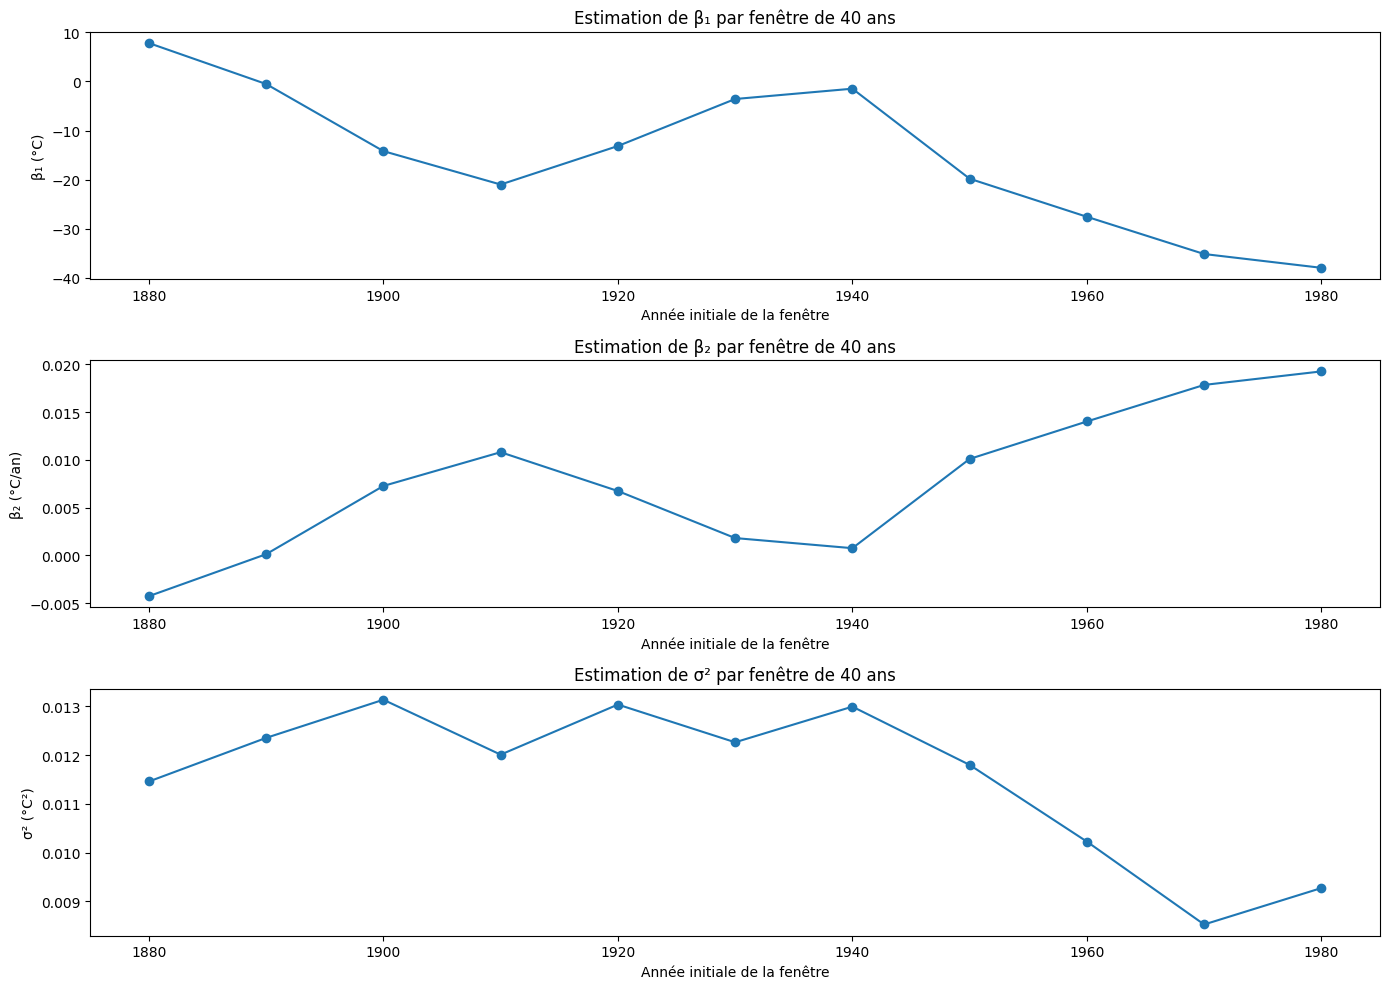

In [79]:
plt.figure(figsize=(14,10))

plt.subplot(3,1,1)
plt.plot(years_ref, b1_values, marker='o')
plt.title("Estimation de β₁ par fenêtre de 40 ans")
plt.xlabel("Année initiale de la fenêtre")
plt.ylabel("β₁ (°C)")

plt.subplot(3,1,2)
plt.plot(years_ref, b2_values, marker='o')
plt.title("Estimation de β₂ par fenêtre de 40 ans")
plt.xlabel("Année initiale de la fenêtre")
plt.ylabel("β₂ (°C/an)")

plt.subplot(3,1,3)
plt.plot(years_ref, sigma_values, marker='o')
plt.title("Estimation de σ² par fenêtre de 40 ans")
plt.xlabel("Année initiale de la fenêtre")
plt.ylabel("σ² (°C²)")

plt.tight_layout()
plt.show()

Une fois ces valeurs estimées, on peut représenter, pour chaque fenêtre temporelle, un histogramme descriptive des réalisations du modèle  
$$
X_i = \beta_1 + \beta_2 t_i + \varepsilon_i, \qquad \varepsilon_i \sim \mathcal N(0,\sigma^2),
$$  
c’est-à-dire les anomalies observées par rapport à la droite de régression, avec la variabilité aléatoire capturée par le terme gaussien. On ne considère pas à ce moment les variations des estimateurs.


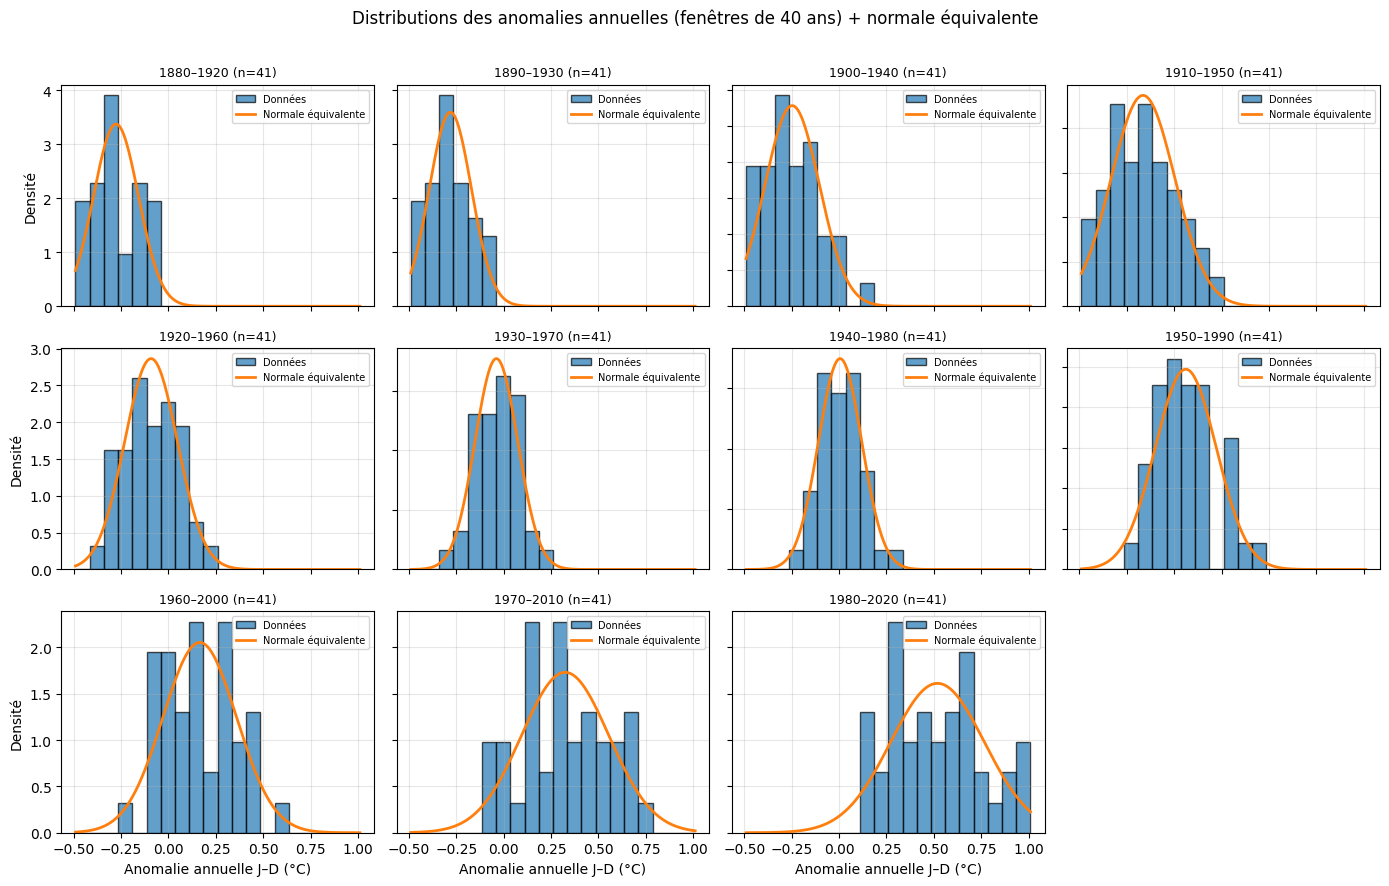

In [80]:
windows = [(start, start+40) for start in range(1880, 1981, 10)]

series = df[['Year','J-D']].dropna()
series = series[(series['Year'] >= 1880) & (series['Year'] <= 2020)]
global_min = series['J-D'].min()
global_max = series['J-D'].max()
bins = np.linspace(global_min, global_max, 21)  # 20 bins

fig, axes = plt.subplots(3, 4, figsize=(14, 9))
axes = axes.flatten()

def normal_pdf(x, mu, sigma):
    return (1.0 / (np.sqrt(2*np.pi)*sigma)) * np.exp(-0.5*((x - mu)/sigma)**2)

b1_values, b2_values, sigma2_values, years_ref = [], [], [], []

for k, (a, b) in enumerate(windows):
    ax = axes[k]
    sub = series[(series['Year'] >= a) & (series['Year'] <= b)].copy()
    w = sub['J-D'].dropna().to_numpy()
    # Histograme
    ax.hist(w, bins=bins, density=True, edgecolor="black", alpha=0.7, label="Données")

    #Estime les valeurs de la fênetre
    try:
        b1, b2, sigma2_hat, n, tbar, Stt = estimate(df, a, b)
        b1_values.append(b1); b2_values.append(b2); sigma2_values.append(sigma2_hat); years_ref.append(a)

        # Parametres de la normal équivalent
        var_T = Stt / n
        mu_mix = b1 + b2 * tbar
        tau2_mix = sigma2_hat + (b2**2) * var_T
        tau_mix = np.sqrt(max(tau2_mix, 1e-12)) #cas d'une variance trop petite

        xgrid = np.linspace(bins[0], bins[-1], 400)
        ax.plot(xgrid, normal_pdf(xgrid, mu_mix, tau_mix), linewidth=2, label="Normale équivalente")

        title_n = len(w)
        ax.set_title(f"{a}–{b} (n={title_n})", fontsize=9)
    except ValueError as e:
        ax.set_title(f"{a}–{b} (erreur: {e})", fontsize=9)

    if k % 4 == 0:
        ax.set_ylabel("Densité")
    else:
        ax.set_yticklabels([])
    if k >= 8:
        ax.set_xlabel("Anomalie annuelle J–D (°C)")
    else:
        ax.set_xticklabels([])
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=7, loc="best")

if len(windows) < len(axes):
    for idx in range(len(windows), len(axes)):
        fig.delaxes(axes[idx])

fig.suptitle("Distributions des anomalies annuelles (fenêtres de 40 ans) + normale équivalente", y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Exercice 4

on sait que $\frac{(n-2) \hat{\sigma}^2}{\sigma ^2}$ suit la loi de $\chi^2$ de degré de liberté $n-2$. Donc l'intervalle de confiance est:
$$ I = [\frac{(n-2) \hat{\sigma}^2}{q_{1 - \alpha/2}},\frac{(n-2) \hat{\sigma}^2}{q_{\alpha/2}}] $$
ou  $q_{1 - \alpha/2}$ et $q_{\alpha/2}$ sont les quantiles de la loi Ksi 2 d'ordres respectives $1 - \alpha/2$ et $\alpha/2$.

De meme, on sait que $\frac{\hat{\beta_j} - \beta_j}{\hat{\sigma_j}}$ suit une loi de Student de degre de liberte egale a $n-2$, donc l'intervalle de confiance des $\beta_j$ est :
$$I = [\beta_j - t_{1-\alpha/2} \hat{\sigma_j} , \beta_j + t_{1-\alpha/2} \hat{\sigma_j}] $$
tel que $t_{1-\alpha/2}$ est le quantile de la loi Student de degré de liberté $n-2$ pour la valeur $\alpha/2$

In [81]:
from scipy.stats import t as t_dist, chi2

n = 41             # 41 points (les extremités sont inclues)
sigma1_values = []
sigma2_values = []
cpt = 0
for year in range(1880, 1981, 10) :
  average_t= (year + year + 40)/2
  S,T = 0 ,0         # initier les sommes présents dans l'expression de sigma1 et sigma2
  for yr in range(year, year+41):
    S = S + yr**2
    T = T + (yr - average_t)**2
  sigma1_values.append((sigma_values[cpt]*S/(T))/n)
  sigma2_values.append((sigma_values[cpt])/(T))
  cpt = cpt + 1

Ic_sigma = []
Ic_beta1 = []
Ic_beta2 = []
alpha = 0.05

chi2_hi = chi2.ppf(1 - alpha/2, n - 2)
chi2_lo = chi2.ppf(alpha/2,     n - 2)
k = t_dist.ppf(1- alpha/2, n-2)

print(k, chi2_hi,chi2_lo)
for i in range(0, len(sigma1_values)):
  y = years_ref[i]
  Ic_sigma.append([y,[sigma_values[i]*(n-2)/chi2_hi,sigma_values[i]*(n-2)/chi2_lo]])
  Ic_beta1.append([y,[b1_values[i]-k*(sigma1_values[i])**(0.5),b1_values[i]+k*(sigma1_values[i])**(0.5)]])
  Ic_beta2.append([y,[b2_values[i]-k*(sigma2_values[i])**(0.5),b2_values[i]+k*(sigma2_values[i])**(0.5)]])

# print(Ic_sigma)
# print(Ic_beta1)
# print(Ic_beta2)

2.0226909200367604 58.12005973468633 23.65432455759302


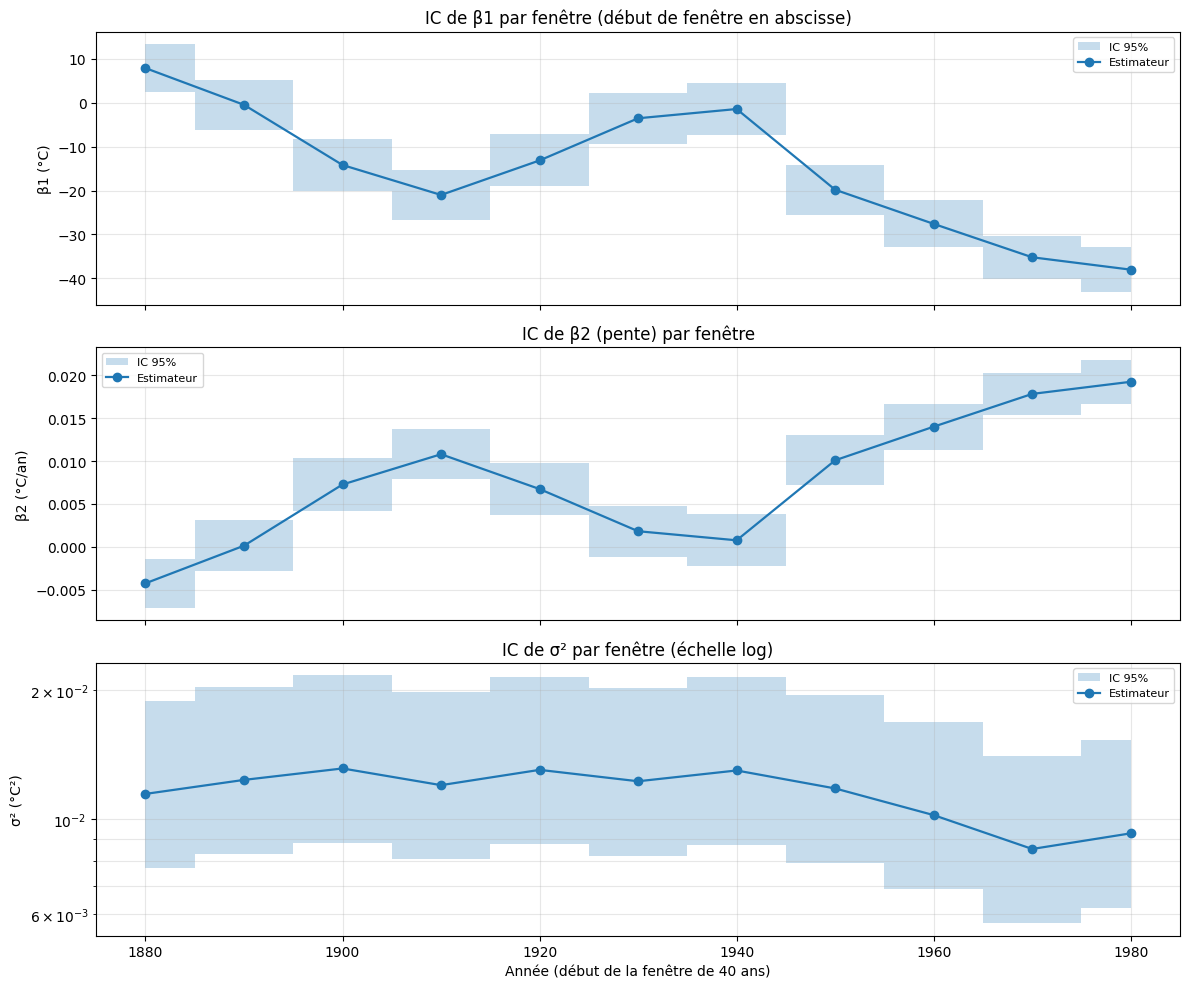

In [82]:

#Plots des intervalles de confiance (IC) de β1, β2 et σ² par fenêtres de 40 ans (GISTEMP).

def parse_ci(ci_list):
    """Transforme [[year, [lo, hi]], ...] en (years, lo, hi) numpy arrays triés par année."""
    yrs, lo, hi = [], [], []
    for item in ci_list:
        if item is None:
            continue
        y, bounds = item
        l, u = bounds
        yrs.append(int(y))
        lo.append(float(l))
        hi.append(float(u))
    yrs = np.asarray(yrs)
    lo = np.asarray(lo)
    hi = np.asarray(hi)
    order = np.argsort(yrs)
    return yrs[order], lo[order], hi[order]


def map_center(years_ref, values, years_target):
    """Mappe des estimates (par years_ref) vers years_target; retourne array aligné (NaN si manquant)."""
    d = {int(y): float(v) for y, v in zip(years_ref, values)}
    return np.array([d.get(int(y), np.nan) for y in years_target], dtype=float)


def plot_ci(ax, x, center, lo, hi, *, title, ylabel):
    m = np.isfinite(x) & np.isfinite(center) & np.isfinite(lo) & np.isfinite(hi)
    x, center, lo, hi = x[m], center[m], lo[m], hi[m]
    ax.fill_between(x, lo, hi, alpha=0.25, step='mid', label="IC 95%")
    ax.plot(x, center, marker='o', linewidth=1.6, label="Estimateur")
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3)
    ax.legend(loc="best", fontsize=8)


# ---------- Parsing des CIs ----------
y_b1, lo_b1, hi_b1 = parse_ci(Ic_beta1)
y_b2, lo_b2, hi_b2 = parse_ci(Ic_beta2)
y_s2, lo_s2, hi_s2 = parse_ci(Ic_sigma)

# ---------- Centres (estimates) alignés sur les années des CIs ----------
b1_c = map_center(years_ref, b1_values, y_b1)
b2_c = map_center(years_ref, b2_values, y_b2)
s2_c = map_center(years_ref, sigma_values, y_s2)

# ---------- Figure 1 : trois panneaux partagent X ----------
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

plot_ci(axs[0], y_b1, b1_c, lo_b1, hi_b1,
        title="IC de β1 par fenêtre (début de fenêtre en abscisse)",
        ylabel="β1 (°C)")

plot_ci(axs[1], y_b2, b2_c, lo_b2, hi_b2,
        title="IC de β2 (pente) par fenêtre",
        ylabel="β2 (°C/an)")

# σ² : souvent à grande échelle -> échelle log utile
m = np.isfinite(y_s2) & np.isfinite(s2_c) & np.isfinite(lo_s2) & np.isfinite(hi_s2) & (lo_s2>0) & (hi_s2>0)
axs[2].fill_between(y_s2[m], lo_s2[m], hi_s2[m], alpha=0.25, step='mid', label="IC 95%")
axs[2].plot(y_s2[m], s2_c[m], marker='o', linewidth=1.6, label="Estimateur")
axs[2].set_yscale('log')
axs[2].set_title("IC de σ² par fenêtre (échelle log)")
axs[2].set_xlabel("Année (début de la fenêtre de 40 ans)")
axs[2].set_ylabel("σ² (°C²)")
axs[2].grid(True, which='both', alpha=0.3)
axs[2].legend(loc="best", fontsize=8)

plt.tight_layout()
plt.show()

Exercice 5 : intervalles de confiances de prediction :  
l'IC de prediction de $\hat{X_i}$ est :
$$[\hat{X}_{n+1} \pm t_{1 - \alpha /2} \hat{\sigma} \sqrt{1 + \frac{1}{n} + \frac{(t_{n+1} - \bar{t})^2}{\sum (t_i - \bar{t})^2}}]$$



[[1880, [np.float64(-0.593145948213555), np.float64(-0.13873210056693042)]], [1890, [np.float64(-0.5144943339362846), np.float64(-0.04267639777103249)]], [1900, [np.float64(-0.33745871571003083), np.float64(0.14906847180759472)]], [1910, [np.float64(-0.1708949049347543), np.float64(0.2943095390810972)]], [1920, [np.float64(-0.1923332105054716), np.float64(0.292357600749374)]], [1930, [np.float64(-0.23549773678403313), np.float64(0.234595297759643)]], [1940, [np.float64(-0.2202528290978044), np.float64(0.2636430730002436)]], [1950, [np.float64(0.04194316313520652), np.float64(0.5030568368647881)]], [1960, [np.float64(0.24485193798182525), np.float64(0.6741236717742707)]], [1970, [np.float64(0.502867192810018), np.float64(0.894840124263152)]], [1980, [np.float64(0.7195340354239016), np.float64(1.1283196231126773)]]]


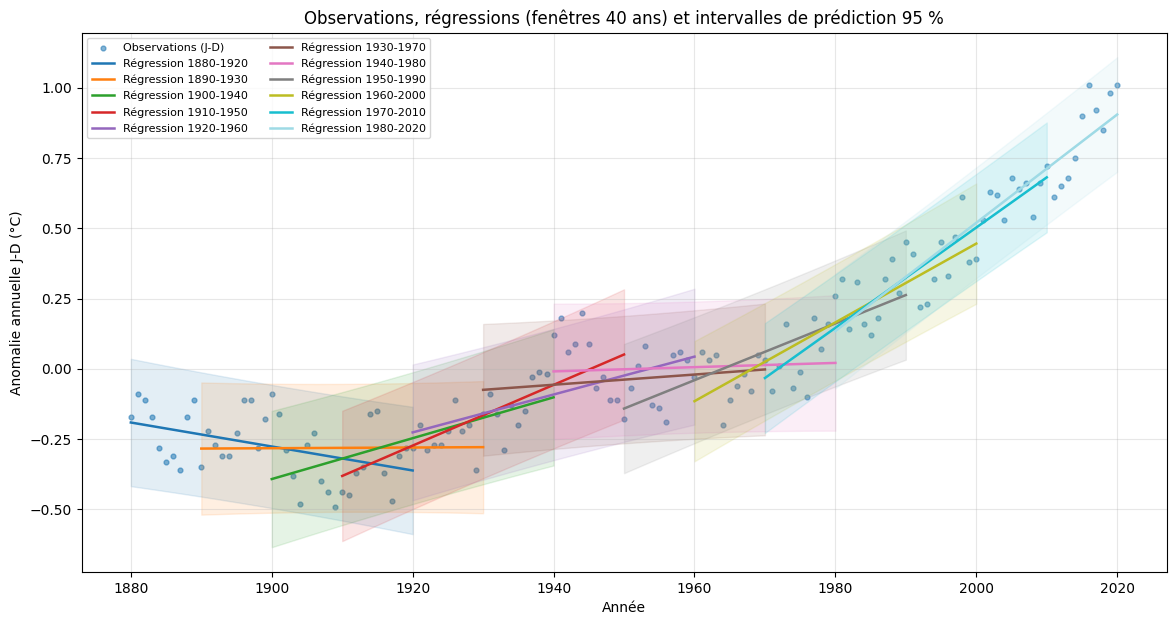

In [83]:
IC_prediction = []
values_predicted = []
Vari = []
Years = []
cpt = 0
for year in range(1880, 1981, 10) :
  Years.append(year)
  average_t = (year + year + 40)/2
  X = b1_values[cpt] + (year + 41)*b2_values[cpt]   #valeur estimée de X_{n+1}
  S = 0
  for yr in range(year, year + 41) :
    S = S + (yr - average_t)**2
  var = k*((sigma_values[cpt])*(1 + (1/n) + ((year + 41 - average_t)**2)/S))**(0.5)
  Vari.append(var)
  IC_prediction.append([year,[X - var, X + var]])
  values_predicted.append(X)
  cpt = cpt + 1

print(IC_prediction)
annual = df[['Year', 'J-D']].dropna().copy()

fig, ax = plt.subplots(figsize=(14, 7))

ax.scatter(annual['Year'], annual['J-D'], s=12, alpha=0.55, label="Observations (J-D)")

colors = plt.cm.tab20(np.linspace(0, 1, len(windows))) # couleurs distinctes pour chaque fenêtre


for k, (a, b) in enumerate(windows):
    b1, b2, sigma, n, tbar, Stt = estimate(df, a, b)

    # t critique pour 95 %
    tcrit = t_dist.ppf(0.975, n - 2)

    # Grille d'années dans la fenêtre
    t_grid = np.arange(a, b + 1)
    y_hat  = b1 + b2 * t_grid

    # Écart-type de prédiction sur la grille :
    se_pred = np.sqrt(sigma * (1.0 + 1.0/n + ((t_grid - tbar)**2) / Stt))
    y_low   = y_hat - tcrit * se_pred
    y_high  = y_hat + tcrit * se_pred

    # 2) Droite de régression
    ax.plot(t_grid, y_hat, lw=1.8, color=colors[k], label=f"Régression {a}-{b}")

    # 3) Bande d’intervalle de prédiction 95 %
    ax.fill_between(t_grid, y_low, y_high, color=colors[k], alpha=0.12)

ax.set_title("Observations, régressions (fenêtres 40 ans) et intervalles de prédiction 95 %")
ax.set_xlabel("Année")
ax.set_ylabel("Anomalie annuelle J-D (°C)")
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, fontsize=8)


## Exercice 6:
Visualisation des résidus standardisés pour chaque intervalle:

Les résidus standardisés sont:
$$
r_i \;=\; \frac{(X_i - \hat{\beta_1} - \hat{\beta_2}t_i)^2}{\hat{\sigma}\,\sqrt{1 - h_{ii}}}
$$
où $h_{ii}$ vient de la diagonale de la matrice des projections sur l'espace vectoriel engendré par **1** et **t** définie par  $\underline{T}(\underline{T}^T\underline{T})^{-1}\underline{T}^T$ :
$$
h_{ii} \;=\; \frac{1}{n} \;+\; \frac{(t_i - \bar{t})^2}{\sum_{j=1}^n (t_j - \bar{t})^2}
$$

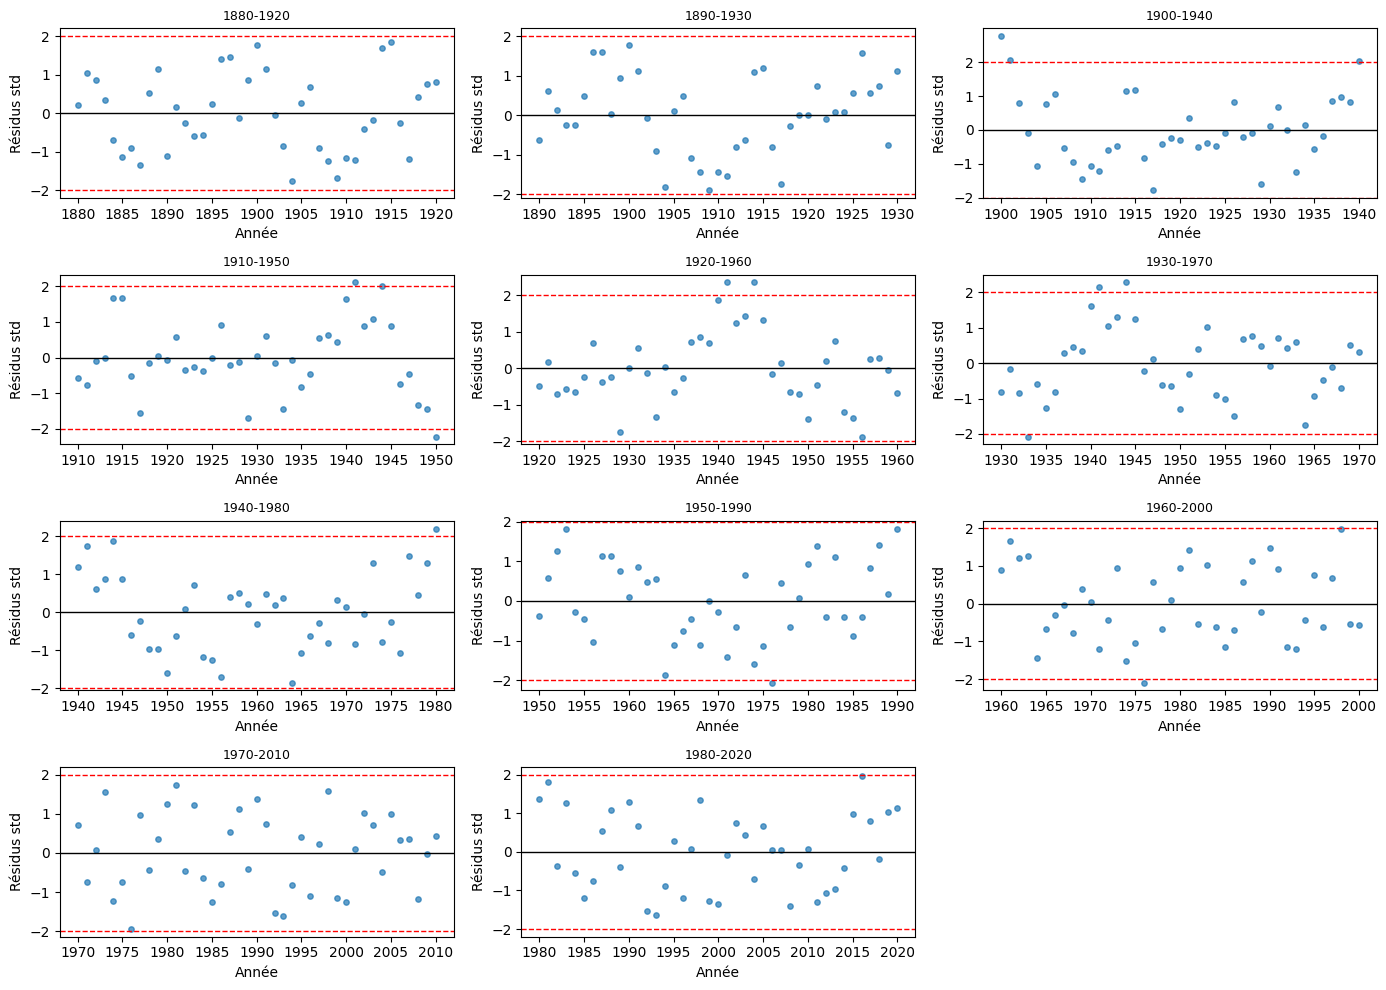

In [84]:
windows = []
for year in range(1880, 1981, 10):
    windows.append((year, year + 40))
annual = df[['Year', 'J-D']].dropna().copy()


def standardized_residuals(years, x, b1, b2, sigma2, n, tbar, Sxx):
    yhat = b1 + b2 * years
    resid = x - yhat
    h_ii = (1/n) + ((years - tbar)**2) / Sxx
    std_resid = resid / (np.sqrt(sigma2) * np.sqrt(1 - h_ii))
    return resid, std_resid

plt.figure(figsize=(14,10))

for k, (a,b) in enumerate(windows):
    sub = annual[(annual['Year'] >= a) & (annual['Year'] <= b)].copy()
    if sub.empty: continue
    years = sub['Year'].values
    x = sub['J-D'].values

    b1,b2,sigma2,n,tbar,Stt = estimate(df,a,b)
    resid,std_resid = standardized_residuals(years,x,b1,b2,sigma2,n,tbar,Stt)

    plt.subplot(4,3,k+1)
    plt.scatter(years,std_resid,s=15,alpha=0.7)
    plt.axhline(0,color="black",lw=1)
    plt.axhline(2,color="red",ls="--",lw=1)
    plt.axhline(-2,color="red",ls="--",lw=1)
    plt.title(f"{a}-{b}",fontsize=9)
    plt.xlabel("Année"); plt.ylabel("Résidus std")

plt.tight_layout()
plt.show()


## Exercice 7:

Cette exploration numérique vise à décrire l’évolution des anomalies de température à travers un modèle statistique gaussien, afin de :
* estimer la tendance de fond du réchauffement climatique,
* quantifier l’incertitude à l’aide d’intervalles de confiance,
* et évaluer la qualité du modèle grâce aux résidus.

Chaque paramètre porte des informations importantes :
* $X_i$ représente l’anomalie de température observée pour l’année $t_i$,
* $\beta_1$ est l’ordonnée à l’origine, interprétée comme une anomalie moyenne de référence,
* $\beta_2$ est la pente, mesurant la tendance moyenne,
* $\varepsilon_i$ est le terme d’erreur, il traduit la variabilité climatique non expliquée par le modèle.

Nous faisons l’hypothèse que les erreurs $\varepsilon_i$ suivent une loi normale centrée :
$$
\varepsilon_i \sim \mathcal{N}(0, \sigma^2), \quad \text{indépendantes et de variance commune}.
$$

Cette hypothèse se justifie car :
* la variabilité climatique résulte de nombreux phénomènes aléatoires, dont la combinaison peut être bien approchée par une distribution normale (principe central limite),
* la loi normale permet d’obtenir des résultats théoriques exacts sur la distribution des estimateurs (loi de Student pour $\hat{\beta}_1, \hat{\beta}_2$, loi du $\chi^2$ pour $\hat{\sigma}^2$),
* elle permet de faciliter la construction d’intervalles de confiance.

Enfin, l’utilisation d’intervalles de temps de 40 ans, décalés de 10 ans, permet :
* de lisser la variabilité interannuelle et de mettre en évidence la tendance de fond,
* de suivre l’évolution estimée de la pente $\beta_2$ dans le temps et donc de détecter une éventuelle accélération du réchauffement.

## Conclusions
À partir de la visualisation des anomalies annuelles (J-D), saisonnières (DJF, MAM, JJA, SON) et mensuelles (1880–2020), il apparaît clairement que, même avec une variabilité interannuelle et saisonnière, il existe une tendance croissante sur le long terme.

Les pentes estimées $\beta_2$ deviennent de plus en plus positives au fil des fenêtres. De plus, on observe une accélération significative du réchauffement climatique depuis les années 1940.

La variance résiduelle est plus grande dans les fenêtres anciennes, ce qui traduit une variabilité aléatoire plus forte, alors que les périodes récentes présentent une tendance linéaire qui explique mieux la structure des données.

Enfin, les résidus standardisés sont globalement bien distribués autour de 0 (dans l’intervalle [−2,2]), confirmant la validité du modèle et l’absence de biais systématique.
